# iNeuron Internship

# Project: Flight Fare Prediction

### Problem Statement:

Travelling through flights has become an integral part of today’s lifestyle as more andmore people are opting for faster travelling options. The flight ticket prices increase ordecrease every now and then depending on various factors like timing of the flights,destination, and duration of flights various occasions such as vacations or festive season. Therefore, having some basic idea of the flight fares before planning the trip will surely help many people save money and time.The main goal is to predict the fares of the flights based on different factors available inthe provided dataset.

### Approach

The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building, and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Importing Training Dataset:

In [2]:
A = pd.read_csv("C:/Users/aksha/OneDrive/Desktop/Data_Train.csv")

In [3]:
A.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Analyzing the dataset 

In [4]:
A.shape

(10683, 11)

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
A.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
A.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [8]:
A.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [9]:
A.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [10]:
A.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
42h 45m      1
42h 5m       1
35h 20m      1
37h 10m      1
Name: Duration, Length: 368, dtype: int64

# Missing data treatement:

In [11]:
A.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [12]:
A.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
A.dropna(inplace=True)

In [14]:
A.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Checking visually

<AxesSubplot:>

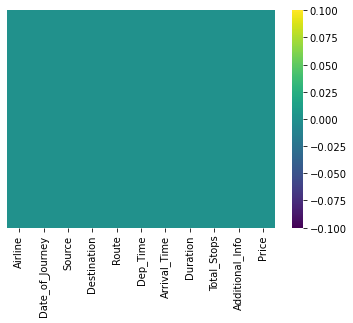

In [15]:
sb.heatmap(A.isnull(), yticklabels = False , cmap = "viridis")

# Feature Engineering:

In the given dataset,Date_of_Journey is a object data type.

Therefore, it has to be converted into timestamp so as to use this column for prediction.

to_datetime is used to convert object data type to datetime datatype.

In [16]:
A['Date_of_Journey'] = pd.to_datetime(A.Date_of_Journey, format='%d/%m/%Y')

In [17]:
A.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [18]:
print(A.Date_of_Journey.dtype)

datetime64[ns]


In [19]:
#extracting only day from the date
A['Journey_day']=A['Date_of_Journey'].dt.day

In [20]:
#extracting month from the date
A['Journey_Month'] = A['Date_of_Journey'].dt.month

In [21]:
A.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [22]:
#dropping date_of_journey column
A.drop(["Date_of_Journey"],axis=1,inplace=True)
A.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [23]:
#similarly for Arrival_Time
A['Arrival_Time'] = pd.to_datetime(A.Arrival_Time) 

In [24]:
A.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,2023-03-12 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,2023-03-12 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,2023-03-12 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [25]:
#extracting hour from time
A['Arrival_hour'] = A['Arrival_Time'].dt.hour
#extracting min from time
A['Arrival_minute'] = A['Arrival_Time'].dt.minute

In [26]:
A.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,2023-03-12 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,2023-03-12 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,2023-03-12 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [27]:
#dropping arrival time column
A.drop(["Arrival_Time"],axis=1,inplace=True)

In [28]:
A.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35


In [29]:
A['Dep_Time'] = pd.to_datetime(A.Dep_Time) 
A.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2023-03-12 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2023-03-12 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2023-03-12 09:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2023-03-12 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2023-03-12 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [30]:
#extracting hour from time
A['Dep_hour'] = A['Dep_Time'].dt.hour
#extracting min from time
A['Dep_minute'] = A['Dep_Time'].dt.minute

In [31]:
A.drop(["Dep_Time"],axis=1,inplace=True)

In [32]:
A.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [33]:
# Duration is the time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time
# Assigning and converting Duration column into list to extract values one by one in for-loop
duration = list(A["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

In [34]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts minutes from duration

In [35]:
A['Duration_hours'] = duration_hours
A['Duration_minutes'] = duration_mins
A.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [36]:
#dropping duration
A.drop(["Duration"],axis=1,inplace=True)

In [37]:
A.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,21,35,16,50,4,45


# OneHotEncoding 

Handling  categorical data and converting the categorical columns to numerical format.

Use pd.getdummies() function for conversion.

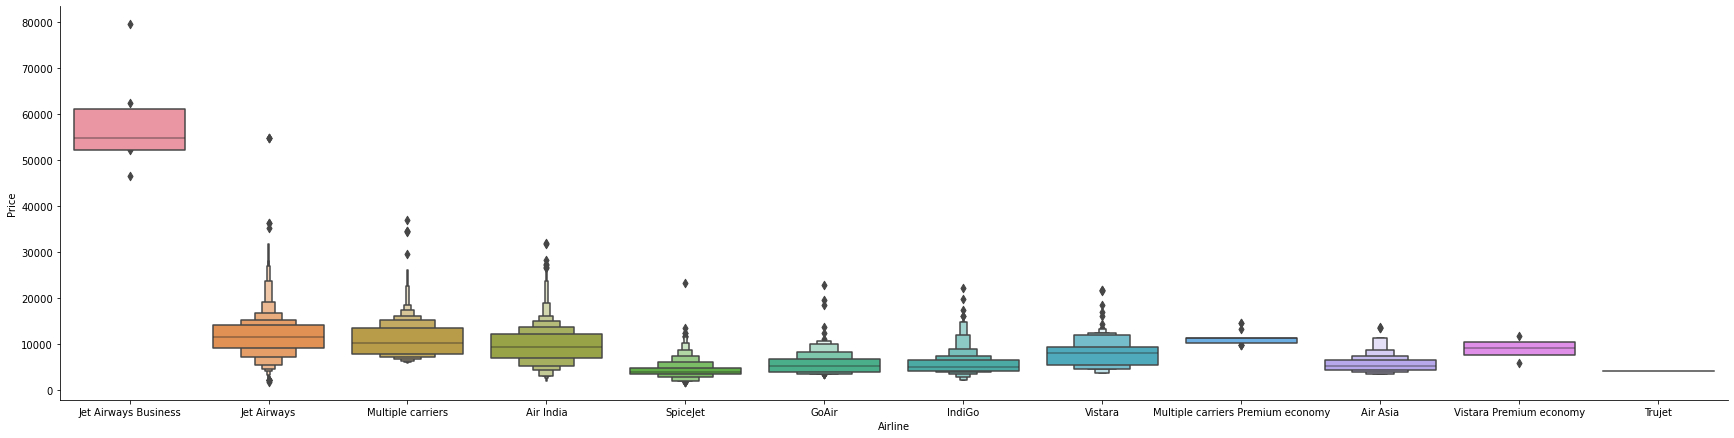

In [38]:
# Graph of Airline vs Price
sb.catplot(y='Price', x='Airline', data=A.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=4)
plt.show()

In [39]:
Airline = A['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


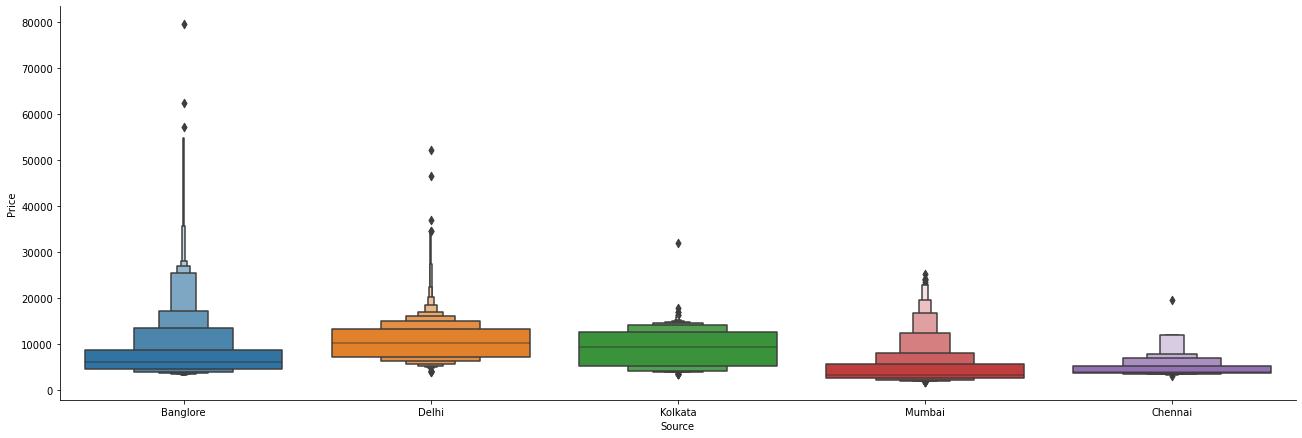

In [40]:
# Graph of Destination vs Price
sb.catplot(y='Price', x='Source', data=A.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [41]:
Source = A['Source']
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


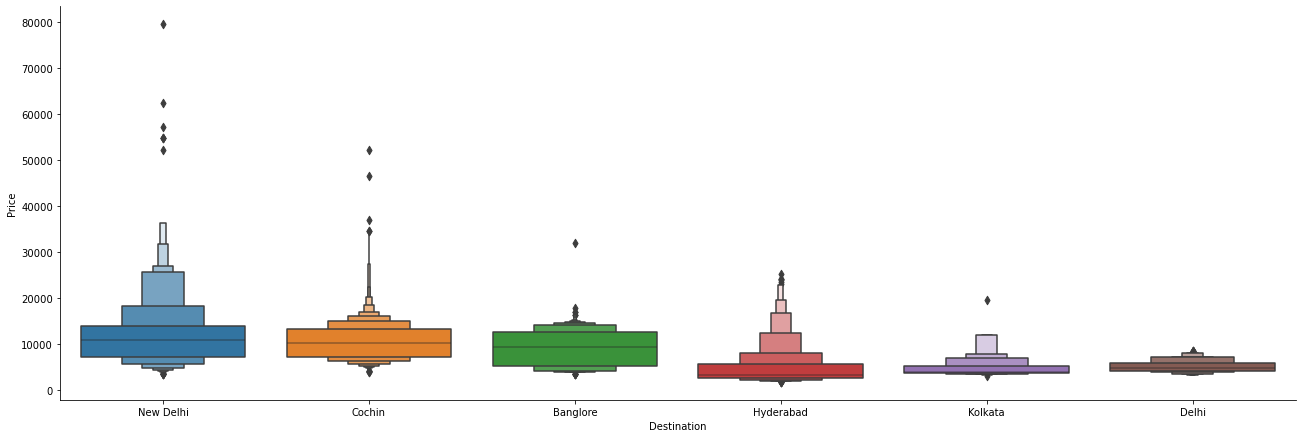

In [42]:
# Graph of Destination vs Price
sb.catplot(y='Price', x='Destination', data=A.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [43]:
Destination = A['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


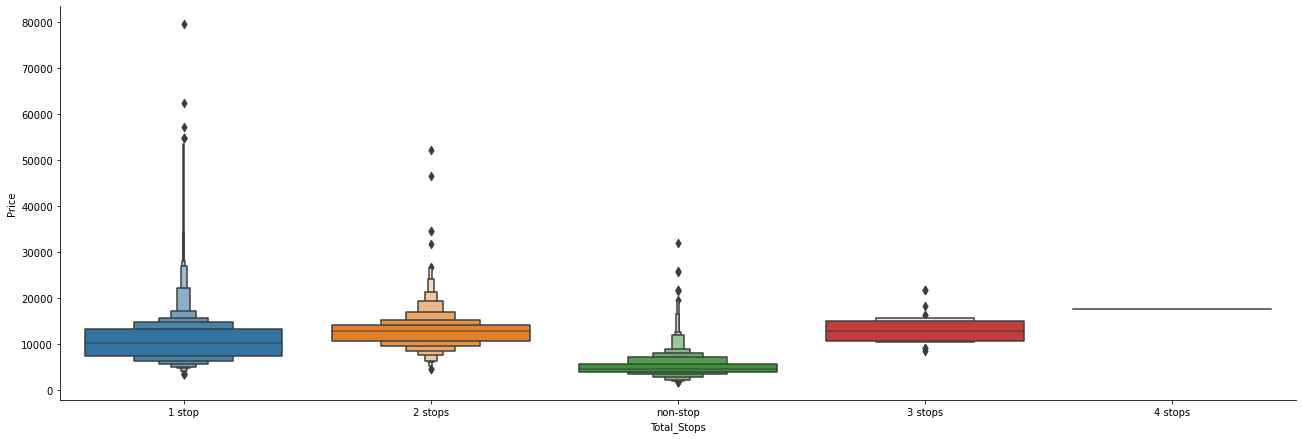

In [44]:
# Graph of Total_Stops vs Price
sb.catplot(y='Price', x='Total_Stops', data=A.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [45]:
# Here Total_stop are categorical so we are converting or replacing to 1,2,3,4 in form of Dict
A.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
A.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1,No info,13302,1,3,21,35,16,50,4,45


# Dropping uneccessery columns

In [46]:
A.drop(["Route","Additional_Info"],axis=1,inplace=True)

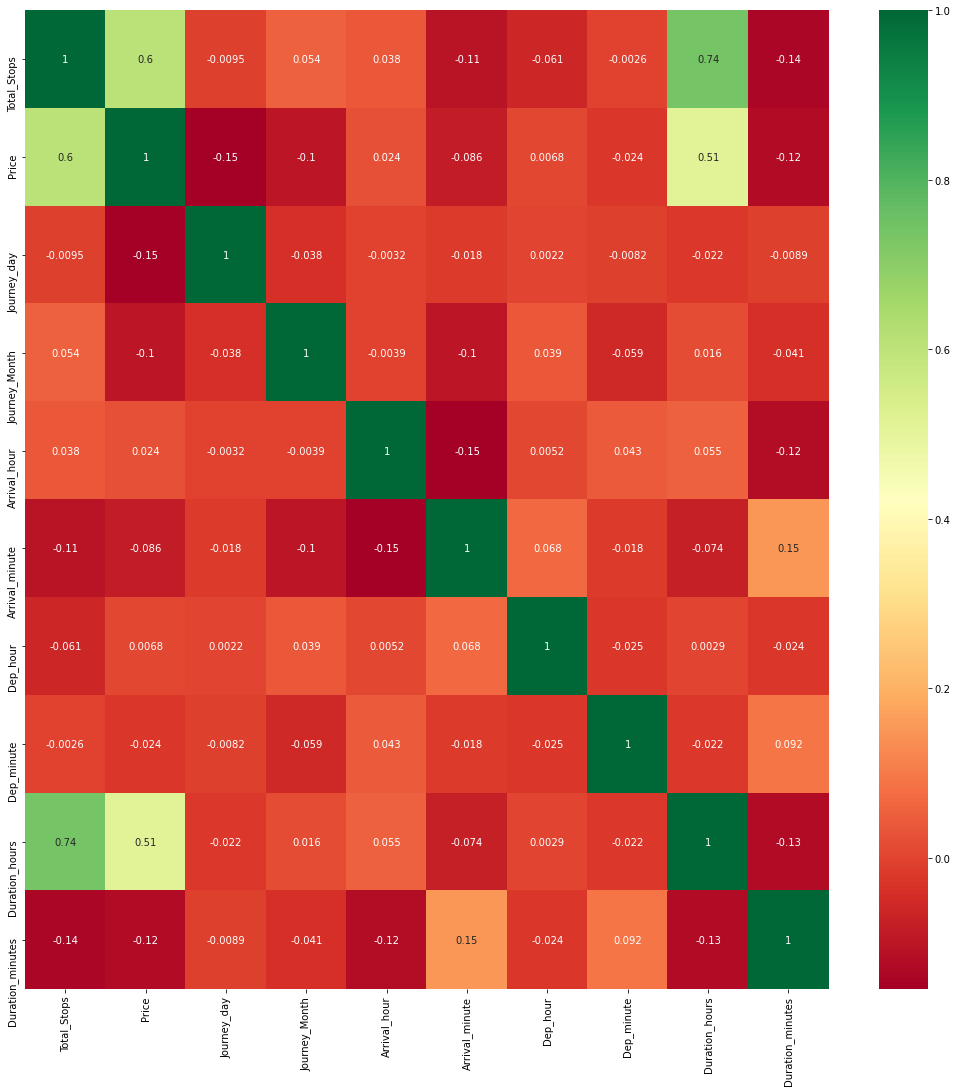

In [47]:
plt.figure(figsize=(18,18))
sb.heatmap(A.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [48]:
#Concat dataframe
A = pd.concat([A, Airline, Source, Destination], axis=1)

In [49]:
A.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,...,0,0,0,0,0,0,0,0,0,1


In [50]:
#drpping columns
A.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [51]:
A.shape

(10682, 30)

# Importing test dataset:

In [52]:
B = pd.read_csv("C:/Users/aksha/OneDrive/Desktop/Test_set.csv")

In [53]:
B.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [54]:
B.shape

(2671, 10)

In [55]:
B.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [56]:
B.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL ? BOM ? COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [57]:
B['Date_of_Journey'] = pd.to_datetime(B.Date_of_Journey, format='%d/%m/%Y')
B['Journey_day'] = B['Date_of_Journey'].dt.day
B['Journey_month'] = B['Date_of_Journey'].dt.month

In [58]:
B.drop(['Date_of_Journey'], axis=1, inplace=True)

In [59]:
B['Arrival_Time'] = pd.to_datetime(B.Arrival_Time)
B['Arrival_hour'] = B['Arrival_Time'].dt.hour
B['Arrival_minute'] = B['Arrival_Time'].dt.minute

In [60]:
B.drop(['Arrival_Time'], axis=1, inplace=True)

In [61]:
B['Dep_Time'] = pd.to_datetime(B.Dep_Time)
B['Dep_hour'] = B['Dep_Time'].dt.hour
B['Dep_minute'] = B['Dep_Time'].dt.minute

In [62]:
B.drop(['Dep_Time'], axis=1, inplace=True)

In [63]:
B.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,6,2,45,23,55


In [64]:
duration = list(B["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]    

In [65]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    

In [66]:
B['Duration_hours'] = duration_hours
B['Duration_minutes'] = duration_mins

In [67]:
B.drop(['Duration'], axis=1, inplace=True)

In [68]:
B.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,6,6,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,1 stop,No info,12,5,10,20,6,20,4,0
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,In-flight meal not included,21,5,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,21,5,21,0,8,0,13,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,non-stop,No info,24,6,2,45,23,55,2,50


In [69]:
Airline = B['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)

In [70]:
Source = B['Source']
Source = pd.get_dummies(Source, drop_first=True)

In [71]:
Destination = B['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)

In [72]:
B.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
B.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1,No info,6,6,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,1,No info,12,5,10,20,6,20,4,0
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1,In-flight meal not included,21,5,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1,No info,21,5,21,0,8,0,13,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,0,No info,24,6,2,45,23,55,2,50


In [73]:
B.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [74]:
B= pd.concat([B, Airline, Source, Destination], axis=1)

In [75]:
B.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [76]:
B.shape

(2671, 28)

In [77]:
B.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,10,20,6,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,...,0,0,0,0,0,0,1,0,0,0


# feature selection

In [78]:
A.shape

(10682, 30)

In [79]:
A.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_Month', 'Arrival_hour',
       'Arrival_minute', 'Dep_hour', 'Dep_minute', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

# declaring X amd Y 

In [80]:
X = A.drop(['Price'], axis=1)
Y = A['Price']

In [81]:
X.head()

,Total_Stops,Journey_day,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,1,10,22,20,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,13,15,5,50,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,4,25,9,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,23,30,18,5,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,21,35,16,50,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [83]:
A.corr()

,Total_Stops,Price,Journey_day,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,0.038140,-0.106940,-0.061476,-0.002618,0.739916,-0.136706,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.024244,-0.086155,0.006799,-0.024458,0.508778,-0.124855,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey_day,-0.009451,-0.153774,1.000000,-0.038359,-0.003245,-0.017510,0.002170,-0.008170,-0.022059,-0.008940,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Journey_Month,0.054383,-0.103643,-0.038359,1.000000,-0.003927,-0.100626,0.039127,-0.059267,0.016141,-0.040897,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,1.000000,-0.154363,0.005180,0.043122,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_minute,-0.106940,-0.086155,-0.017510,-0.100626,-0.154363,1.000000,0.067911,-0.017597,-0.074450,0.151628,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Dep_hour,-0.061476,0.006799,0.002170,0.039127,0.005180,0.067911,1.000000,-0.024745,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_minute,-0.002618,-0.024458,-0.008170,-0.059267,0.043122,-0.017597,-0.024745,1.000000,-0.022104,0.092485,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.055276,-0.074450,0.002869,-0.022104,1.000000,-0.126468,...,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_minutes,-0.136706,-0.124855,-0.008940,-0.040897,-0.118309,0.151628,-0.023707,0.092485,-0.126468,1.000000,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


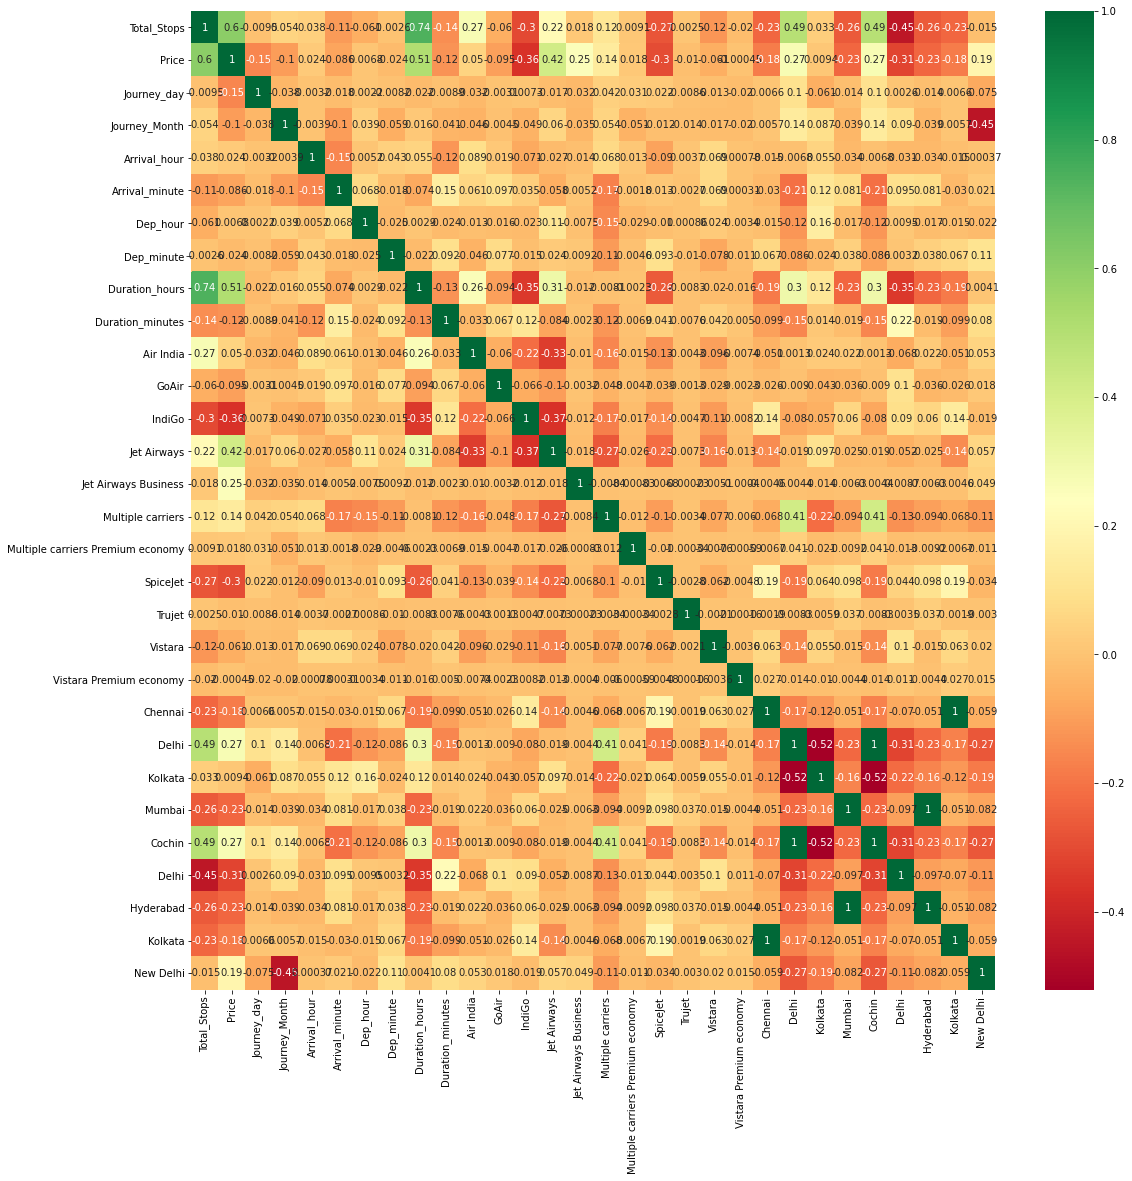

In [84]:
#correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sb.heatmap(A.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [85]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,Y)

ExtraTreesRegressor()

In [86]:
print(etr.feature_importances_)

[2.49917724e-01 1.45254506e-01 5.28972315e-02 2.69823670e-02
 1.88807498e-02 2.40623535e-02 2.10873952e-02 1.06646038e-01
 1.77000259e-02 1.06186100e-02 1.79964082e-03 1.99530596e-02
 1.32046002e-01 6.76601390e-02 2.08044023e-02 8.47960132e-04
 3.57436794e-03 1.16700723e-04 5.10746282e-03 9.28216949e-05
 4.95164312e-04 1.13837314e-02 3.28937165e-03 5.68807381e-03
 9.51969420e-03 1.13725262e-02 6.54801213e-03 4.55802982e-04
 2.51980647e-02]


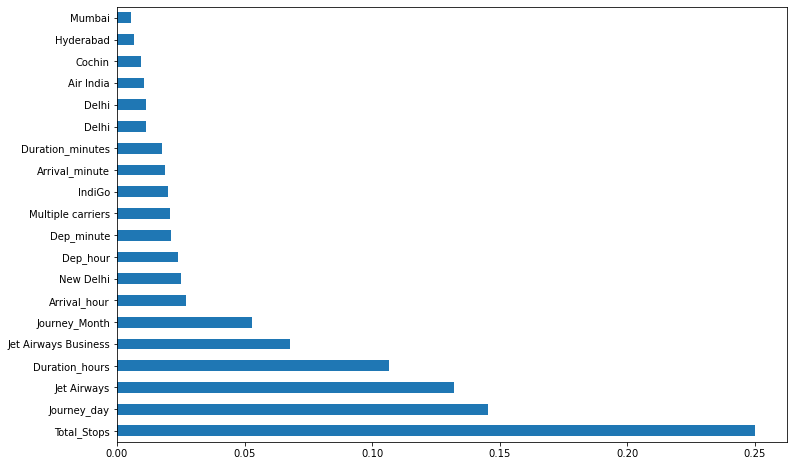

In [87]:
plt.figure(figsize = (12,8))
fig_importances = pd.Series(etr.feature_importances_, index=X.columns)
fig_importances.nlargest(20).plot(kind='barh')
plt.show()

# Model fitting

# Splitting the dataset into training & testing set

In [88]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=31)

In [89]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)

RandomForestRegressor()

In [90]:
y_pred = rfr.predict(xtest)

In [91]:
rfr.score(xtrain,ytrain)

0.9538488028165837

In [92]:
rfr.score(xtest,ytest)

0.8183736737120043

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


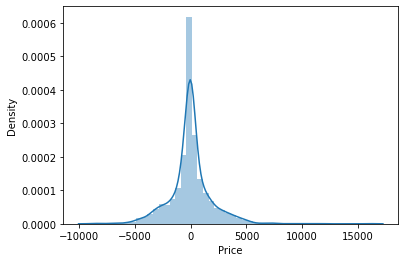

In [93]:
sb.distplot(ytest-y_pred)
plt.show()

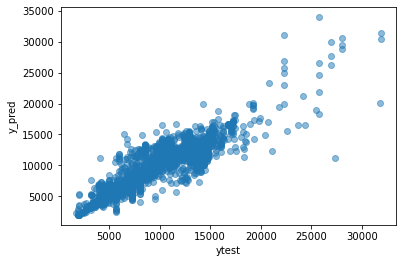

In [94]:
plt.scatter(ytest, y_pred, alpha = 0.5)
plt.xlabel("ytest")
plt.ylabel("y_pred")
plt.show()

In [95]:
from sklearn import metrics

In [96]:
print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
print('MSE:', metrics.mean_squared_error(ytest, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest,y_pred)))

MAE: 1186.8153810962733
MSE: 3449662.743684068
RMSE: 1857.326773533421


In [97]:
metrics.r2_score(ytest, y_pred)

0.8183736737120043

# Hyperparameter Tuning

-RandomizedSearchCV

-GridSearchCV

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [100]:
#creation of grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [101]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [102]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [103]:
pred = rf_random.predict(xtest)

In [104]:
print('MAE:', metrics.mean_absolute_error(ytest,pred))
print('MSE:', metrics.mean_squared_error(ytest, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest,pred)))

MAE: 1136.0279743355
MSE: 2918250.0041408497
RMSE: 1708.2886185129403


In [105]:
import pickle

In [106]:
file = open('flightfare_rf.pkl', 'wb')

In [107]:
pickle.dump(rf_random, file)

In [108]:
model = open('flightfare_rf.pkl','rb')
forest = pickle.load(model)

In [109]:
ypred = forest.predict(xtest)

In [110]:
metrics.r2_score(ytest, ypred)

0.8463527982808012